<a href="https://colab.research.google.com/github/P-Arnav/Projects/blob/PCB-detection/PCB_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the repository and install dependencies
!git clone https://github.com/eirikmn/ultralytics-yolov8_gradcam
%cd ultralytics-yolov8_gradcam
!pip install ultralytics pytorch-gradcam pillow numpy matplotlib

# Note: The custom Grad-CAM logic relies on the local 'ultralytics' folder

Cloning into 'ultralytics-yolov8_gradcam'...
remote: Enumerating objects: 9123, done.
remote: Total 9123 (delta 0), reused 0 (delta 0), pack-reused 9123 (from 1)
Receiving objects: 100% (9123/9123), 36.77 MiB | 27.11 MiB/s, done.
Resolving deltas: 100% (5855/5855), done.
/content/ultralytics-yolov8_gradcam
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.1 MB/s eta 0:00:00
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5249 sha256=66880854104f2ee5b6c966e013a7d4f768f894f80c92485663160e02f559ca70
  Stored in directory: /root/.cache/pip/wheels/b3/37/60/ab0eb271797fc9bf2a8b6edd8e550f2ee0857031e4cc0e2509
Successfully built pytorch-gradcam


In [ ]:
import sys
from PIL import Image
import torch

# The actual modified package is located in the 'ultralytics' sub-folder
sys.path.append('.')
sys.path.append('./ultralytics')

from ultralytics import YOLO

CUSTOM_WEIGHTS_FILE = '/content/Colour.pt'

# Load your custom trained model
model = YOLO(CUSTOM_WEIGHTS_FILE)
print(f"Custom model loaded successfully: {CUSTOM_WEIGHTS_FILE}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Custom model loaded successfully: /content/Colour.pt


Please upload your PCB image and your PCB defect labels file (one class per line).


Saving gradcam_image.jpg to gradcam_image (1).jpg
Saving gradcam_label.txt to gradcam_label (1).txt
**Found and replaced line:** labpath = "../../gradcam_label.txt" -> labpath = "../../gradcam_label.txt"

✅ Critical code modification successful, pointing to: gradcam_label.txt

Input Image:


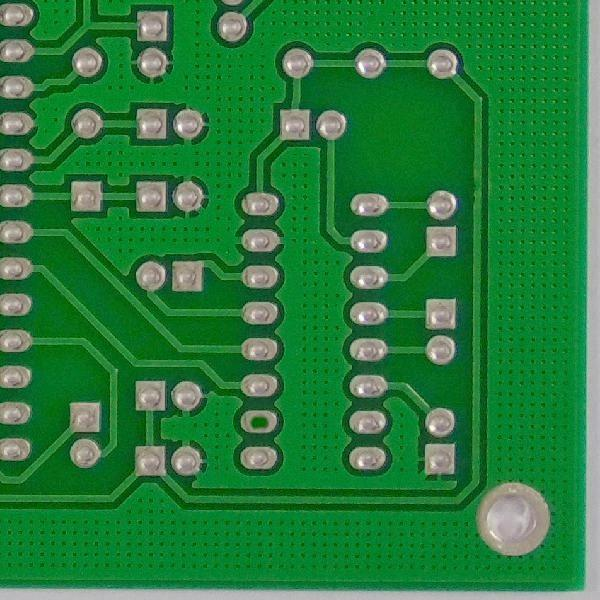

In [ ]:
import os
from google.colab import files
from PIL import Image

# 1. Upload your PCB image and labels file (if you haven't already)
print("Please upload your PCB image and your PCB defect labels file (one class per line).")
uploaded = files.upload()

# 2. Define your file names (MATCH THESE TO YOUR UPLOADED FILES)
CUSTOM_IMAGE_FILE = 'gradcam_image.jpg'     # e.g., 'pcb_test_001.jpg'
CUSTOM_LABELS_FILE = 'gradcam_label.txt' # e.g., 'defect_classes.txt'

# 3. CRITICAL CODE MODIFICATION
predictor_file = './ultralytics/ultralytics/yolo/engine/predictor.py'
target_line = f'labpath = "../../{CUSTOM_LABELS_FILE}"'
modification_successful = False

try:
    with open(predictor_file, 'r') as f:
        lines = f.readlines()

    with open(predictor_file, 'w') as f:
        for line in lines:
            # Look for common variations of the line to replace
            if 'labpath = ' in line and line.strip().startswith('labpath'):
                f.write(f'{target_line}\n')
                modification_successful = True
                print(f"**Found and replaced line:** {line.strip()} -> {target_line}")
            elif '# labpath = "COCO_labels.txt"' in line:
                # If we find the commented out example, inject the line just below it
                f.write(line)
                f.write(f'{target_line}\n')
                modification_successful = True
                print(f"**Injected line after comment:** {target_line}")
            else:
                f.write(line)

except Exception as e:
    print(f"An error occurred during file modification: {e}")

if modification_successful:
    print(f"\n✅ Critical code modification successful, pointing to: {CUSTOM_LABELS_FILE}")
else:
    print("\n⚠️ **WARNING**: Automated modification failed, manual check is required!")
    print(f"Please open **{predictor_file}** and manually insert the line:")
    print(f'`{target_line}`')
    print("...where class label definition lines usually appear (around line 380).")

# Display the uploaded image
print("\nInput Image:")
Image.open(CUSTOM_IMAGE_FILE)

In [ ]:
results = model.predict(
    source=CUSTOM_IMAGE_FILE,  # Your uploaded PCB image
    save=True,
    visualize=True,
    imgsz=640 # IMPORTANT: Use the image size your model was trained with (e.g., 640, 1280)
)

# image list now contains the annotated image with the heatmap
print("\nPrediction complete. The heatmap data is saved as a .npy file in the latest 'runs/detect/predict*' folder.")



Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage0_Conv_features.png... (32/48)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage1_Conv_features.png... (32/96)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage2_C2f_features.png... (32/96)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage3_Conv_features.png... (32/192)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage4_C2f_features.png... (32/192)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage5_Conv_features.png... (32/384)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage6_C2f_features.png... (32/384)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage7_Conv_features.png... (32/576)
Saving /content/ultralytics-yolov8_gradcam/runs/detect/predict/gradcam_image/stage8_C2f_featu

✅ Found 22 feature map file(s). Filtering to 1 deep layer...


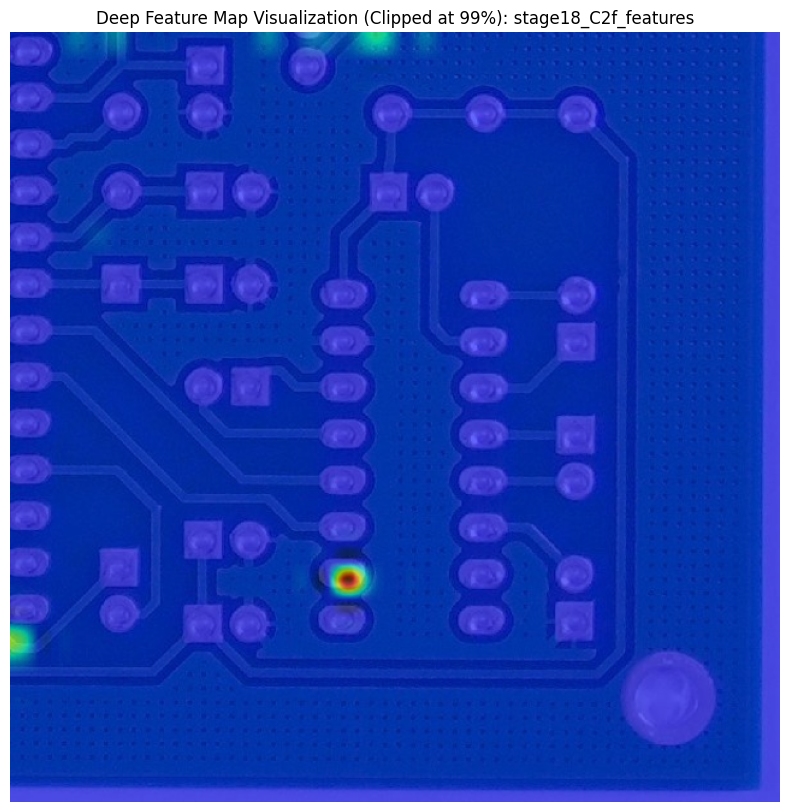

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image

# Define the target size and image file
TARGET_SIZE = 640
CUSTOM_IMAGE_FILE = 'gradcam_image.jpg'
image_base_name = os.path.splitext(CUSTOM_IMAGE_FILE)[0]

# --- CONFIGURATION PARAMETER ---
# Sets the percentile threshold below which activations are clipped (made transparent)
# 95 at minimum works the best
VISUAL_PERCENTILE_THRESHOLD = 99


# --- Visualize Layer ---
RELEVANT_LAYERS = [
    'stage18_C2f_features.npy'
]

# Locate Output Directory
latest_run = max(glob.glob('runs/detect/predict*'), key=os.path.getmtime, default=None)

if latest_run is None:
    print("FATAL ERROR: No prediction run folder found. Please ensure Cell 4 ran successfully.")
else:
    output_subfolder = os.path.join(latest_run, image_base_name)
    if not os.path.isdir(output_subfolder):
        output_subfolder = latest_run

    heatmap_files = glob.glob(os.path.join(output_subfolder, '*.npy'))

    if not heatmap_files:
        print(f"\n❌ FINAL ERROR: No .npy feature map files found in: {output_subfolder}")
    else:
        print(f"✅ Found {len(heatmap_files)} feature map file(s). Filtering to 1 deep layer...")
        original_img = Image.open(CUSTOM_IMAGE_FILE).resize((TARGET_SIZE, TARGET_SIZE))
        original_img_array = np.array(original_img)

        # Plotting Feature Maps
        found_count = 0
        for i, h_path in enumerate(heatmap_files):
            filename = os.path.basename(h_path)
            if filename in RELEVANT_LAYERS:
                found_count += 1
                try:
                    # Load the raw feature map array (Shape: C, H, W)
                    feature_map = np.load(h_path)

                    # CRITICAL STEP 1: Reduce the C dimension by taking the mean across the channels
                    heatmap_2d = feature_map.mean(axis=0)

                    # Find the minimum value based on the configured percentile
                    v_min = np.percentile(heatmap_2d, VISUAL_PERCENTILE_THRESHOLD)

                    # Clip the array: any value below v_min is set to v_min (or 0, effectively)
                    heatmap_2d_clipped = np.clip(heatmap_2d, v_min, heatmap_2d.max())

                    # CRITICAL STEP 2: Rescale the heatmap to the full TARGET_SIZE
                    # Normalize, convert to PIL image, resize, and convert back to NumPy array
                    heatmap_pil = Image.fromarray((heatmap_2d_clipped / heatmap_2d_clipped.max() * 255).astype(np.uint8))
                    heatmap_resized = np.array(heatmap_pil.resize((TARGET_SIZE, TARGET_SIZE), resample=Image.Resampling.LANCZOS))

                    # Plot the result
                    plt.figure(figsize=(10, 10))
                    plt.imshow(original_img_array)

                    # Overlay the processed and resized heatmap
                    plt.imshow(heatmap_resized,
                               alpha=0.6, # Increased alpha slightly for better contrast
                               cmap='jet') # Inverted colormap for blue=high activation

                    # Note: H and W are now 640x640 due to resizing
                    plt.title(f"Deep Feature Map Visualization (Clipped at {VISUAL_PERCENTILE_THRESHOLD}%): {filename.replace('.npy', '')}")
                    plt.axis('off')
                    plt.show()
                    break

                except Exception as e:
                    print(f"Error processing file {h_path}: {e}")

        if found_count == 0:
            print("\n⚠️ WARNING: Could not find the specified layer: stage18_C2f_features.npy")
            print("Please ensure it was successfully generated in Cell 4.")
